Projet Traitment de donnée

Importing libraries, such as pandas to transform the DataSet (csv) into a DataFrame, numpy vectorize the DataFrame, matplotlib to plot the linear regression of the model, Sklearn to to do a simple lienar regression, mpl_toolkit for eventually 3D plots and seaborn for the data correlation heatmap.

In [51]:
import numpy as np
import pandas as pd
from pandas.plotting import parallel_coordinates
import matplotlib.pyplot as plt
import seaborn as sns
import chardet
import plotly.express as px
from sklearn.linear_model import LinearRegression
from mpl_toolkits.mplot3d import Axes3D
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import cosine_distances
from sklearn.decomposition import PCA

REadung the DataSet and transforming it into a pandas DataFrame, extracting non-numeric data and printing out the correlation.

In [77]:
filename = "../data/spotify.csv"

with open(filename, 'rb') as file:
    raw_data = file.read()
    result = chardet.detect(raw_data)
    encoding = result['encoding']

print(f"The folowing DataSet is encoded in : {encoding}")

df = pd.read_csv(filename, encoding=encoding)

df_filtered = df[df["popularity"] != 0]
df_filtered = df_filtered[df_filtered["duration_ms"] != 0]

df_num = df_filtered.select_dtypes(include=['number'])
corr_matrix = df_num.corr()

corr_matrix

The folowing DataSet is encoded in : utf-8


Unnamed: 0  popularity  duration_ms  danceability    energy  \
Unnamed: 0          1.000000    0.055799    -0.030583      0.003906 -0.056264   
popularity          0.055799    1.000000    -0.052322      0.061347 -0.033423   
duration_ms        -0.030583   -0.052322     1.000000     -0.062511  0.060698   
danceability        0.003906    0.061347    -0.062511      1.000000  0.095108   
energy             -0.056264   -0.033423     0.060698      0.095108  1.000000   
key                -0.006464   -0.003137     0.013223      0.033734  0.043789   
loudness           -0.032262    0.071515     0.006551      0.224859  0.758836   
mode                0.006890   -0.006057    -0.033053     -0.065682 -0.082422   
speechiness        -0.095512   -0.090302    -0.067755      0.102328  0.137833   
acousticness        0.070796   -0.009138    -0.107211     -0.132253 -0.724970   
instrumentalness   -0.068168   -0.181604     0.108672     -0.165002 -0.177698   
liveness            0.037141   -0.052048     0.008367     -0.138911  0.185092   
valence             0.055197   -0.013197    -0.142213      0.464110  0.243206   
tempo              -0.027342   -0.018116     0.023459     -0.051294  0.245287   
time_signature     -0.019142    0.032383     0.019487      0.197167  0.180140   

                       key  loudness      mode  speechiness  acousticness  \
Unnamed: 0       -0.006464 -0.032262  0.006890    -0.095512      0.070796   
popularity       -0.003137  0.071515 -0.006057    -0.090302     -0.009138   
duration_ms       0.013223  0.006551 -0.033053    -0.067755     -0.107211   
danceability      0.033734  0.224859 -0.065682     0.102328     -0.132253   
energy            0.043789  0.758836 -0.082422     0.137833     -0.724970   
key               1.000000  0.037403 -0.141434     0.014810     -0.041812   
loudness          0.037403  1.000000 -0.046864     0.054921     -0.577861   
mode             -0.141434 -0.046864  1.000000    -0.042894      0.095958   
speechiness       0.014810  0.054921 -0.042894     1.000000      0.010602   
acousticness     -0.041812 -0.577861  0.095958     0.010602      1.000000   
instrumentalness -0.004192 -0.427955 -0.049396    -0.095634      0.090189   
liveness         -0.002000  0.077883  0.016672     0.212343     -0.015054   
valence           0.027252  0.262280  0.017098     0.034193     -0.085135   
tempo             0.005808  0.216484 -0.005467     0.003393     -0.205680   
time_signature    0.013707  0.192694 -0.024612    -0.009509     -0.168843   

                  instrumentalness  liveness   valence     tempo  \
Unnamed: 0               -0.068168  0.037141  0.055197 -0.027342   
popularity               -0.181604 -0.052048 -0.013197 -0.018116   
duration_ms               0.108672  0.008367 -0.142213  0.023459   
danceability             -0.165002 -0.138911  0.464110 -0.051294   
energy                   -0.177698  0.185092  0.243206  0.245287   
key                      -0.004192 -0.002000  0.027252  0.005808   
loudness                 -0.427955  0.077883  0.262280  0.216484   
mode                     -0.049396  0.016672  0.017098 -0.005467   
speechiness              -0.095634  0.212343  0.034193  0.003393   
acousticness              0.090189 -0.015054 -0.085135 -0.205680   
instrumentalness          1.000000 -0.092191 -0.316710 -0.050605   
liveness                 -0.092191  1.000000  0.021458 -0.005671   
valence                  -0.316710  0.021458  1.000000  0.076655   
tempo                    -0.050605 -0.005671  0.076655  1.000000   
time_signature           -0.082176 -0.028829  0.126519  0.077914   

                  time_signature  
Unnamed: 0             -0.019142  
popularity              0.032383  
duration_ms             0.019487  
danceability            0.197167  
energy                  0.180140  
key                     0.013707  
loudness                0.192694  
mode                   -0.024612  
speechiness            -0.009509  
acousticness           -0.168843  
instrumentalne

Plotting the Heatmap using seaborn and matplotlib, and saving it in a png file.

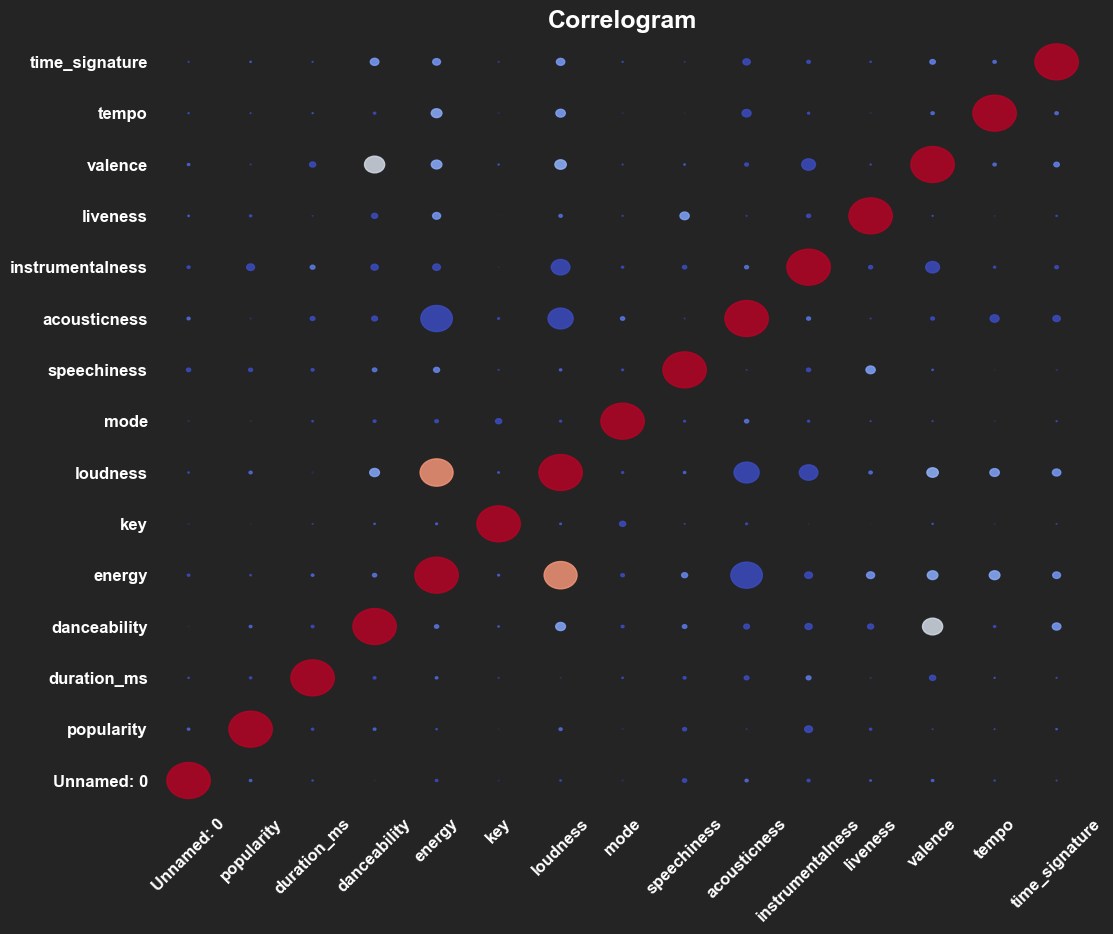

In [14]:
fig, ax = plt.subplots(figsize=(12, 10))


fig.patch.set_facecolor('#242424')
ax.set_facecolor('#242424')


x, y = np.meshgrid(np.arange(corr_matrix.shape[1]), np.arange(corr_matrix.shape[0]))


colors = corr_matrix.values


for i in range(corr_matrix.shape[0]):
    for j in range(corr_matrix.shape[1]):
        size = abs(colors[i, j]) * 700 
        circle = plt.Circle((j, i), radius=size/2000, color=plt.cm.coolwarm(colors[i, j]), alpha=0.85)
        ax.add_patch(circle)


ax.set_xticks(np.arange(corr_matrix.shape[1]))
ax.set_yticks(np.arange(corr_matrix.shape[0]))
ax.set_xticklabels(corr_matrix.columns, rotation=45, fontsize=12, color='white', fontweight='bold')
ax.set_yticklabels(corr_matrix.index, fontsize=12, color='white', fontweight='bold')


plt.xlim(-0.5, corr_matrix.shape[1] - 0.5)
plt.ylim(-0.5, corr_matrix.shape[0] - 0.5)
plt.grid(False)
for spine in ax.spines.values():
    spine.set_visible(False)


plt.title('Correlogram', fontsize=18, color='white', fontweight='bold')

plt.savefig("Correlogram.png")

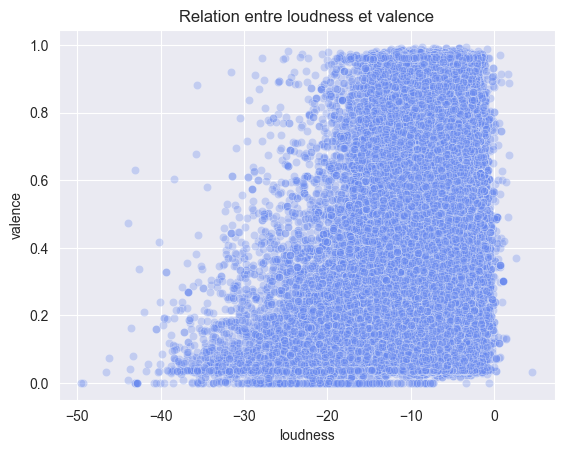

In [38]:
sns.scatterplot(x=df_num['loudness'], y=df_num['valence'], alpha=0.3)
plt.title("Relation entre loudness et valence")
plt.xlabel("loudness")
plt.ylabel("valence")
plt.show()

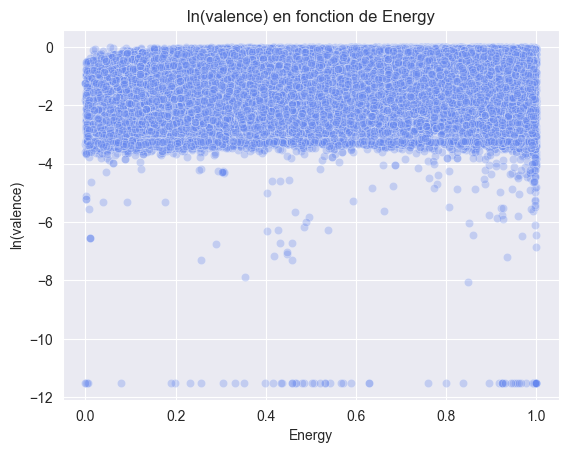

In [37]:
df = df_num[df_num['valence'] > 0]  

sns.scatterplot(x=df['energy'], y=np.log(df['valence']), alpha=0.3)
plt.title("ln(valence) en fonction de Energy")
plt.xlabel("Energy")
plt.ylabel("ln(valence)")
plt.show()

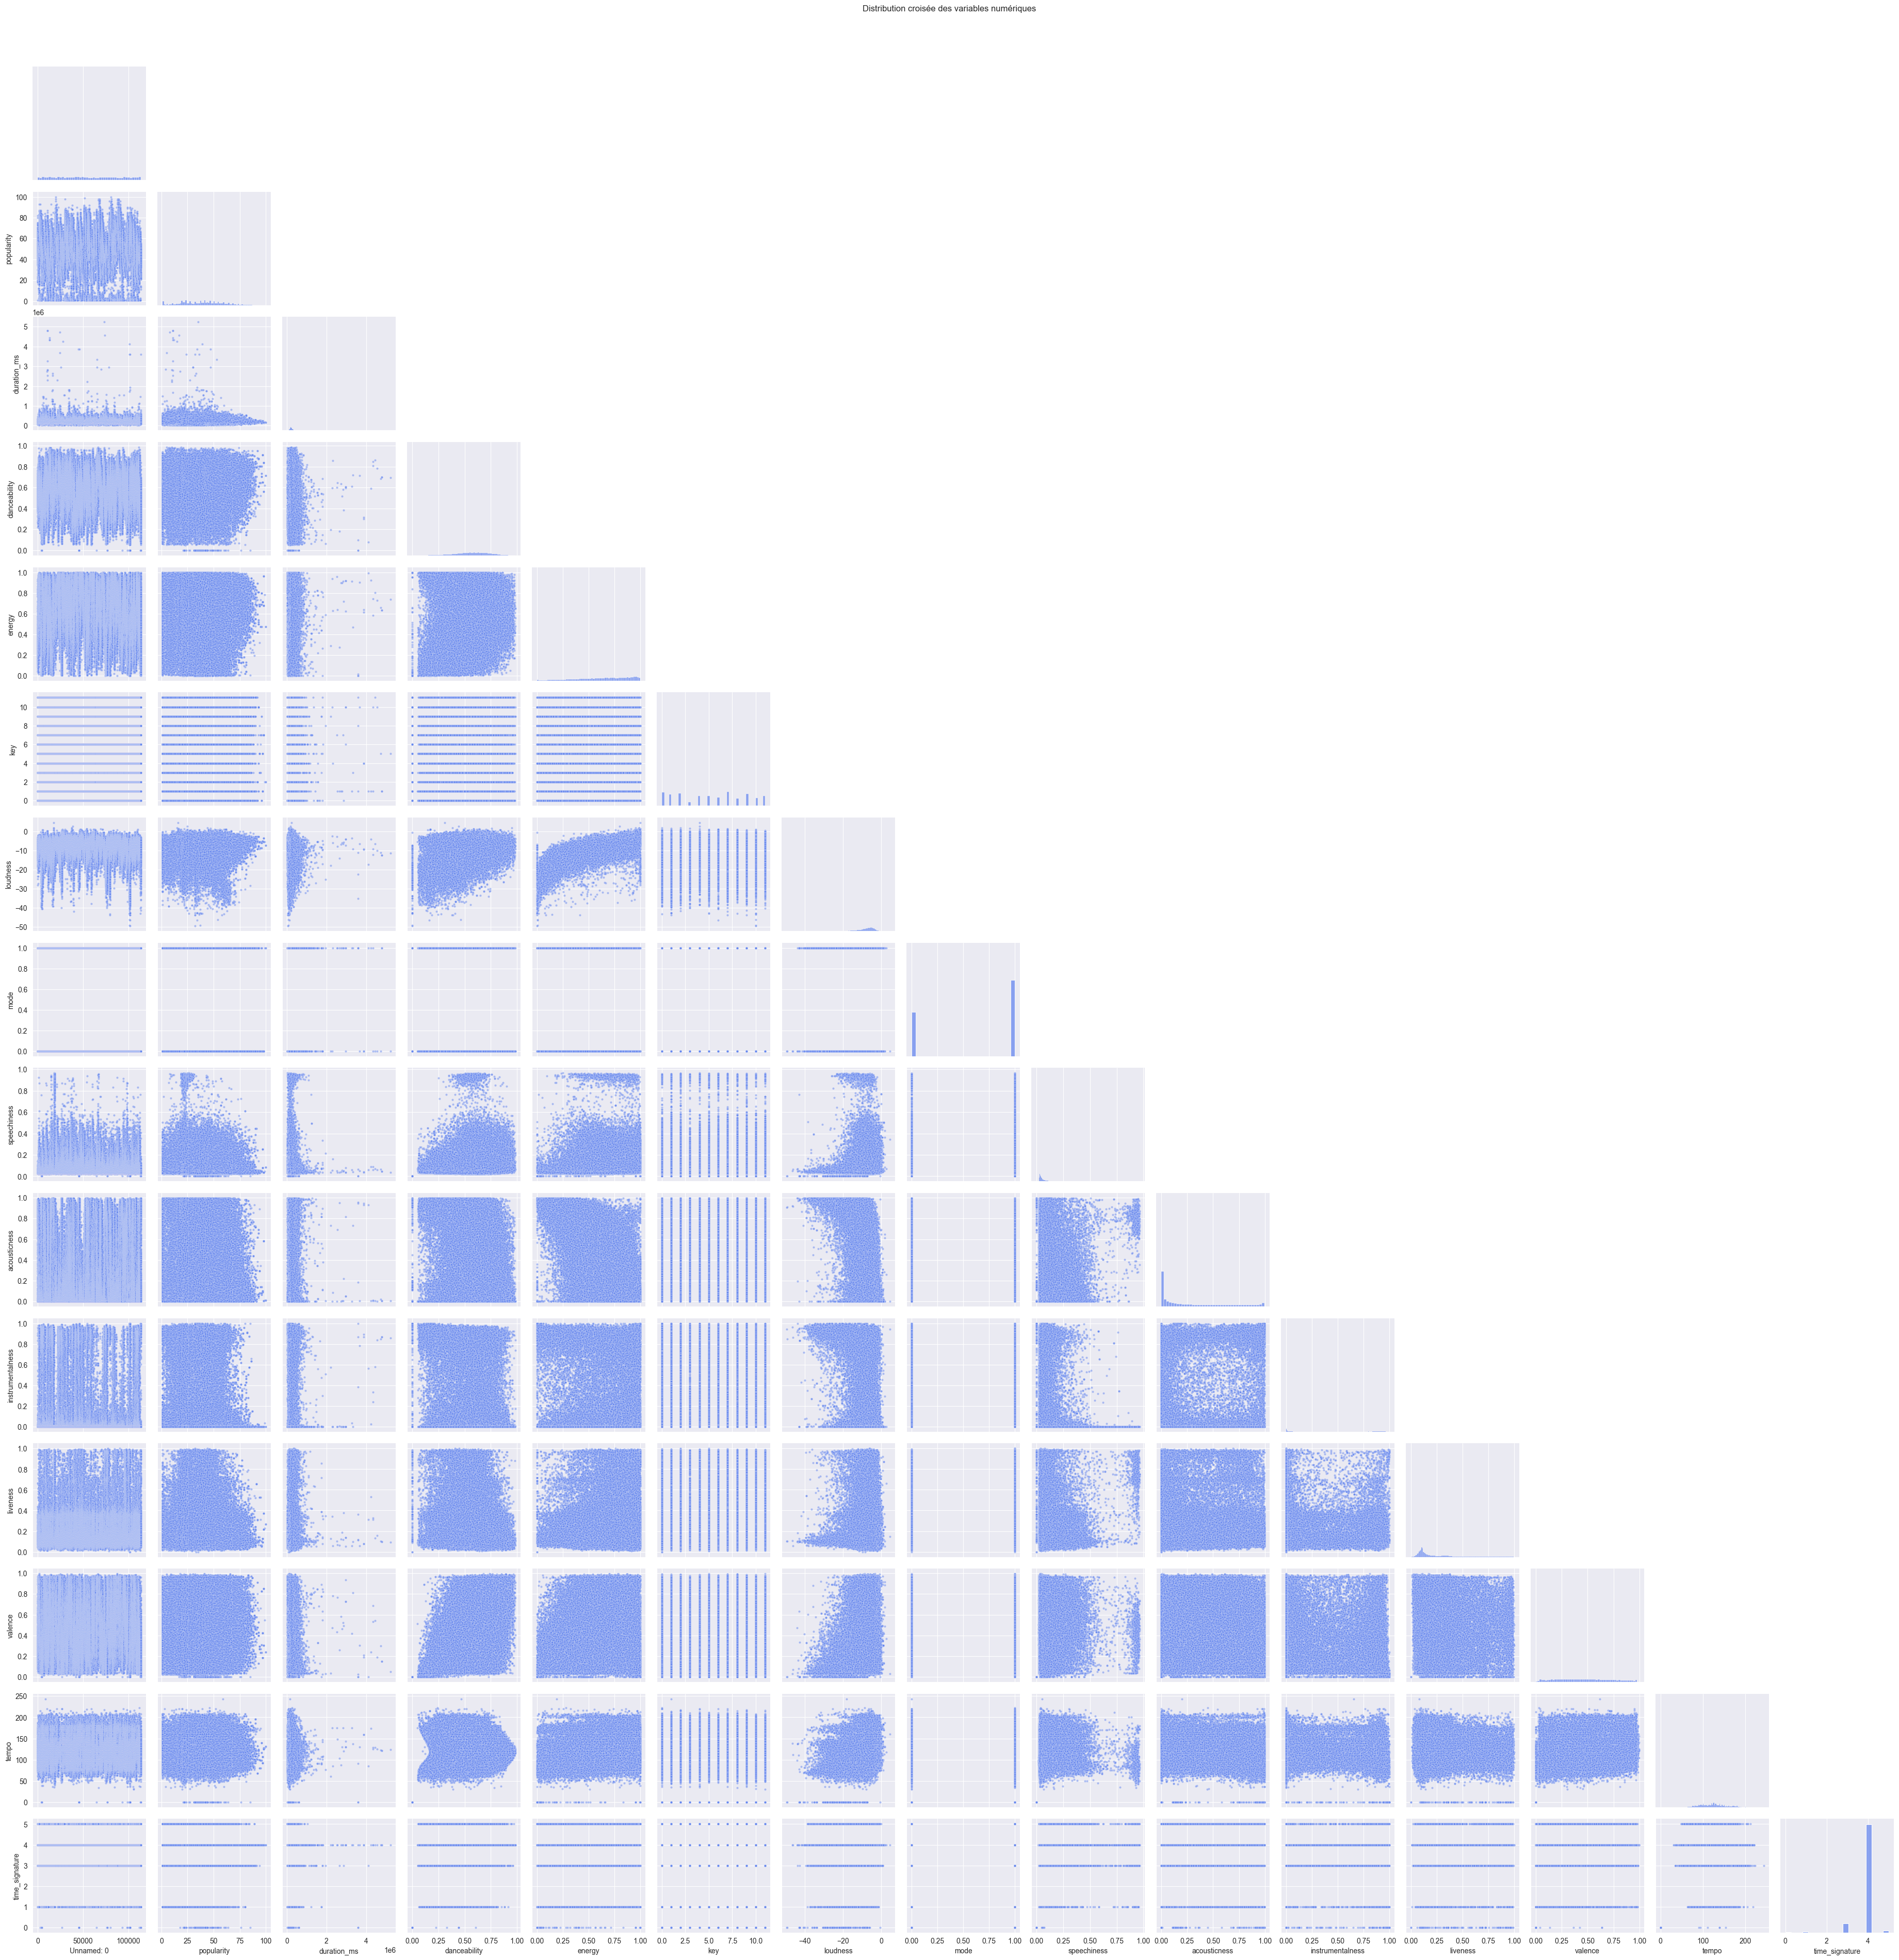

In [15]:
sns.set_style("darkgrid")
sns.set_palette("coolwarm")

sns.pairplot(df_num, corner=True, plot_kws={'alpha': 0.5, 's': 10})

plt.suptitle("Distribution croisée des variables numériques", y=1.02)
plt.show()

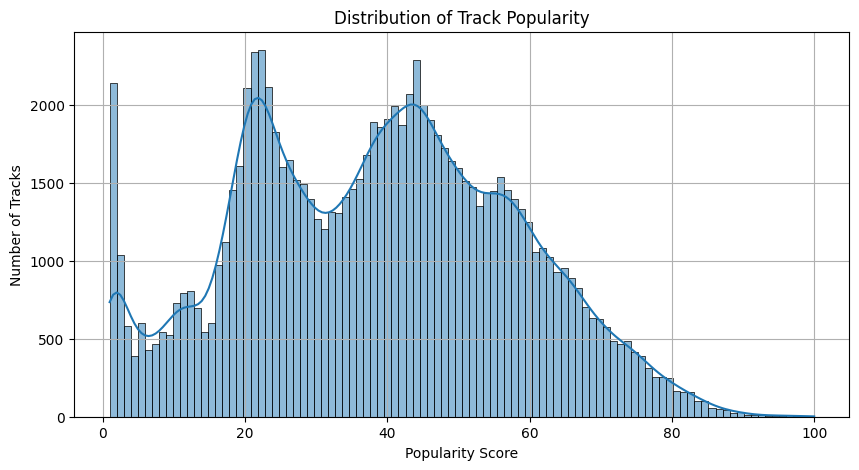

In [4]:
plt.figure(figsize=(10,5))
sns.histplot(df_filtered['popularity'], bins=100, kde=True, edgecolor='black')
plt.title('Distribution of Track Popularity')
plt.xlabel('Popularity Score')
plt.ylabel('Number of Tracks')
plt.grid(True)
plt.show()

C:\Users\lucah\AppData\Local\Temp\ipykernel_18884\266537522.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


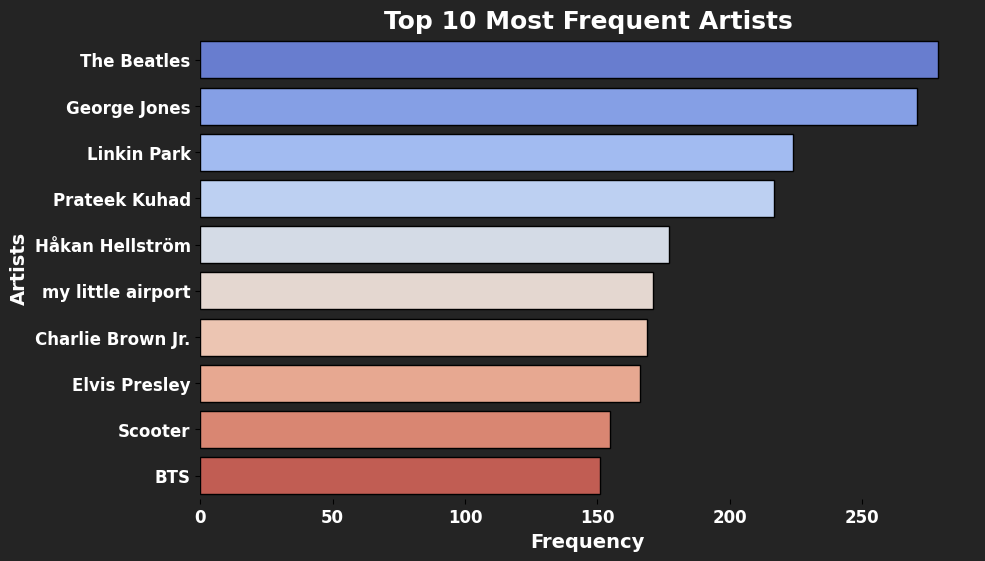

In [5]:
top_artists = df_filtered['artists'].value_counts().head(10)

plt.figure(figsize=(10, 6), facecolor='#242424')  # Set background color

# Create barplot with aesthetic styling
ax = sns.barplot(
    x=top_artists.values, y=top_artists.index, palette='coolwarm', edgecolor='black'
)

# Customization for style
ax.set_facecolor('#242424')  # Match background
ax.set_xlabel('Frequency', fontsize=14, color='white', fontweight='bold')
ax.set_ylabel('Artists', fontsize=14, color='white', fontweight='bold')
ax.set_title('Top 10 Most Frequent Artists', fontsize=18, color='white', fontweight='bold')

# Make labels white for contrast
plt.xticks(color='white', fontsize=12, fontweight='bold')
plt.yticks(color='white', fontsize=12, fontweight='bold')

# Remove unnecessary gridlines
sns.despine(left=True, bottom=True)

# Show plot
plt.savefig("Frequent_Artists.png")

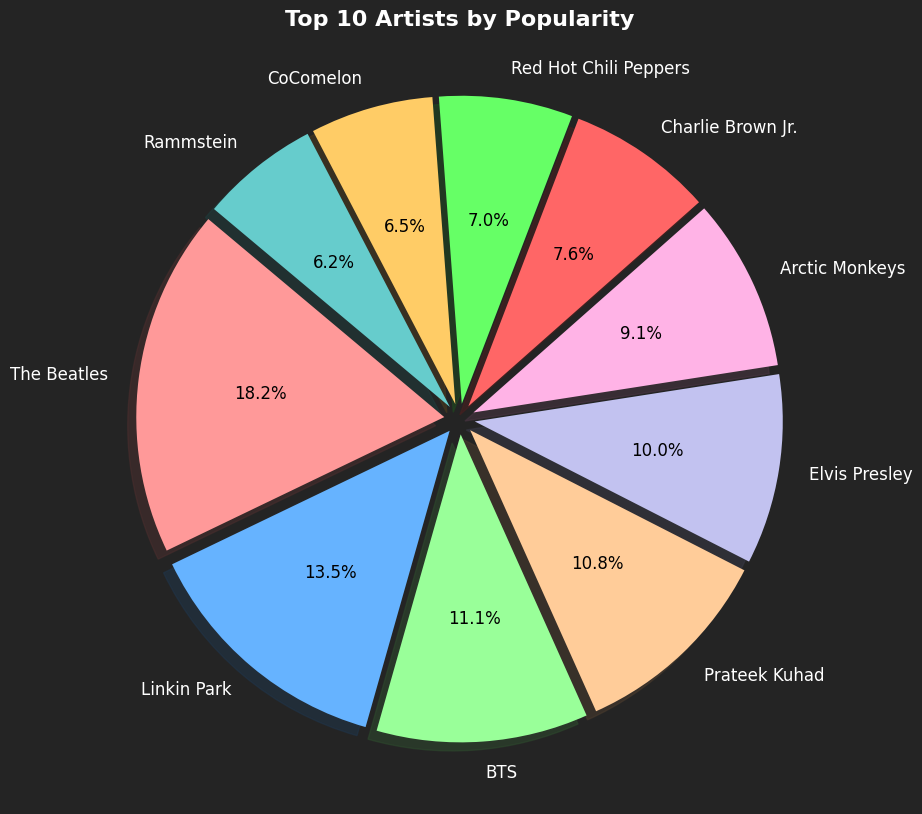

In [6]:
artist_popularity = df_filtered.groupby('artists')['popularity'].sum().sort_values(ascending=False).head(10)

labels = artist_popularity.index.tolist()  # Artist names
sizes = artist_popularity.values.tolist()  # Popularity values

# Custom aesthetic colors
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0', '#ffb3e6', '#ff6666', '#66ff66', '#ffcc66', '#66cccc']
explode = [0.05] * len(labels)  # Slight explosion for all slices

# Create figure with dark background
fig, ax = plt.subplots(figsize=(12, 10))
fig.patch.set_facecolor('#242424')  # Dark mode background
ax.set_facecolor('#242424')

# Create pie chart with stylized effects
wedges, texts, autotexts = ax.pie(
    sizes, labels=labels, autopct='%1.1f%%', startangle=140,
    colors=colors, explode=explode, shadow=True, textprops={'fontsize': 12, 'color': 'white'}
)

# Beautify labels
for text in texts:
    text.set_color('white')
for autotext in autotexts:
    autotext.set_color('black')


plt.title('Top 10 Artists by Popularity', fontsize=16, fontweight='bold', color='white')


plt.savefig("Popular_Artists.png")


C:\Users\lucah\AppData\Local\Temp\ipykernel_18884\22829559.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


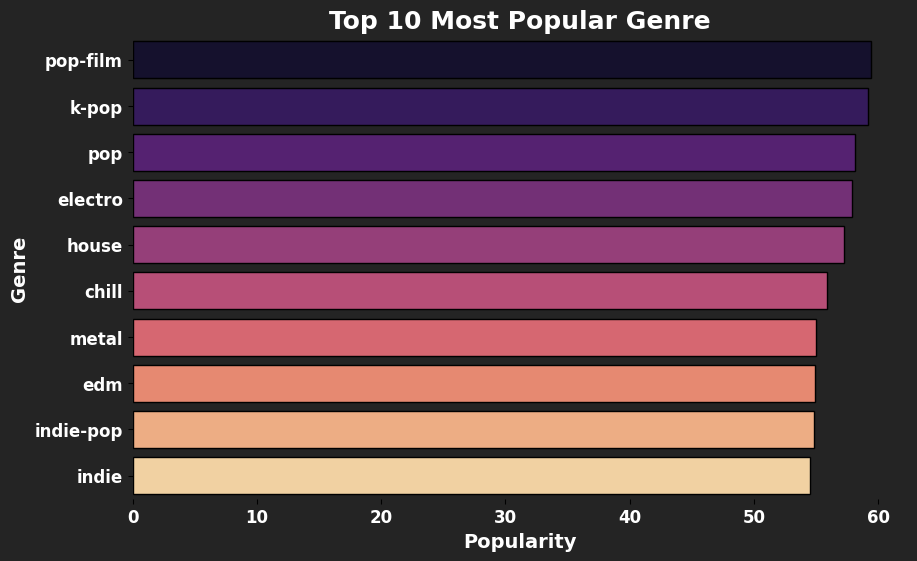

In [7]:
top_genre = df_filtered.groupby('track_genre')['popularity'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6), facecolor='#242424')  # Set background color

# Create barplot with aesthetic styling
ax = sns.barplot(
    x=top_genre.values, y=top_genre.index, palette='magma', edgecolor='black'
)

# Customization for style
ax.set_facecolor('#242424')  # Match background
ax.set_xlabel('Popularity', fontsize=14, color='white', fontweight='bold')
ax.set_ylabel('Genre', fontsize=14, color='white', fontweight='bold')
ax.set_title('Top 10 Most Popular Genre', fontsize=18, color='white', fontweight='bold')

# Make labels white for contrast
plt.xticks(color='white', fontsize=12, fontweight='bold')
plt.yticks(color='white', fontsize=12, fontweight='bold')

# Remove unnecessary gridlines
sns.despine(left=True, bottom=True)

# Show plot
plt.savefig("Frequent_Genre.png")

Define the the parameters of the model: Y ~ X

In [41]:
X = np.array(df_num[["loudness", "danceability", "time_signature"]])
Y = np.array(df_num["popularity"])
print(X.size)
print(Y.size)
#threshold = 100000
#series = pd.Series(df["duration_ms"])
#length = series[series < threshold].count()
#print(f"valeur tronquée = {length}")
#X = X[:length]
#Y = Y[:length]

293940
97980


Create the model, test bach and the train bach

In [42]:
model = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.05)

print(f"Training set size: {X_train.shape[0]}")
print(f"Testing set size: {X_test.shape[0]}\n")

model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

predictions = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(f"{predictions.head()}\n")

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}\n")

r2 = r2_score(y_test, y_pred)
print(f"R-squared score: {r2}")


Training set size: 93081
Testing set size: 4899

   Actual  Predicted
0       4  40.517508
1       9  36.524537
2      56  38.774633
3      26  39.289202
4      53  39.804367

Mean Squared Error: 362.7340120017683

R-squared score: 0.010802031856570249


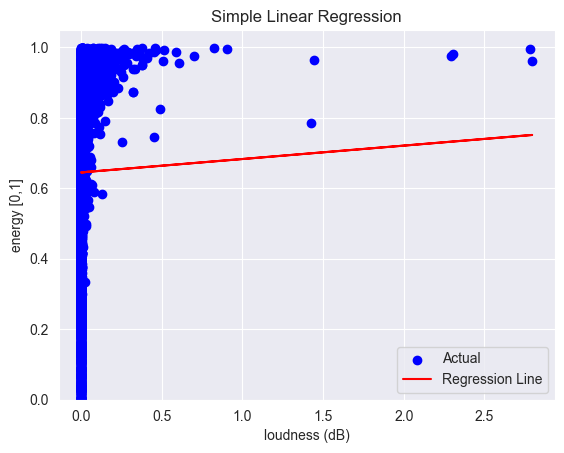

In [33]:
plt.scatter(X_test, y_test, color='blue', label='Actual')


plt.plot(X_test, y_pred, color='red', label='Regression Line')
plt.ylim(bottom=0)

plt.xlabel('loudness (dB)')
plt.ylabel('energy [0,1]')
plt.title('Simple Linear Regression')
plt.legend()
plt.savefig('energy-loudness.png')

3D plot

In [47]:
X_mult = df_num[["loudness", "valence"]]
Y_mult = df_num["energy"]

model_mult = LinearRegression()
model_mult.fit(X_mult, Y_mult)

LinearRegression()

C:\Users\lucah\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


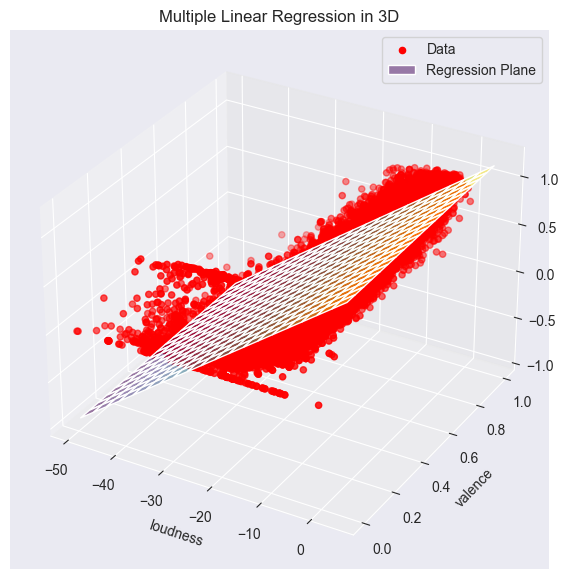

In [48]:
x1_range = np.linspace(X_mult["loudness"].min(), X_mult["loudness"].max(), 20)
x2_range = np.linspace(X_mult["valence"].min(), X_mult["valence"].max(), 20)
x1_grid, x2_grid = np.meshgrid(x1_range, x2_range)

# Predict y for the grid
x_grid = np.column_stack((x1_grid.ravel(), x2_grid.ravel()))
y_pred_mult = model_mult.predict(x_grid).reshape(x1_grid.shape)

# Plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Scatter actual data points
ax.scatter(X_mult["loudness"], X_mult["valence"], Y_mult, color='red', label='Data')

# Plot the regression plane
ax.plot_surface(x1_grid, x2_grid, y_pred_mult, alpha=0.5, cmap='viridis', label='Regression Plane')

ax.set_xlabel("loudness")
ax.set_ylabel("valence")
ax.set_zlabel("energy")
ax.set_title('Multiple Linear Regression in 3D')
plt.legend()
plt.savefig('energy-loudness-valence.png')

Creating AI

In [ ]:
features = ['danceability', 'energy', 'valence', 'acousticness', 
            'instrumentalness', 'liveness', 'speechiness', 'tempo']

X = df_filtered[features].copy()
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

song_name = "Stronger"
track = df_filtered[df_filtered['track_name'].str.contains(song_name, case=False)].iloc[0]

idx = df_filtered.index[df_filtered['track_name'] == track['track_name']][0]

distances = cosine_distances([X_scaled[idx]], X_scaled)[0]
df_filtered['similarity'] = distances

recommendations = df_filtered[df_filtered.index != idx].sort_values('similarity', ascending=True).head(5)
print(recommendations[['track_name', 'artists', 'similarity']])

             track_name                  artists  similarity
2555   Tears Don't Fall  Bullet For My Valentine         0.0
72012  Tears Don't Fall  Bullet For My Valentine         0.0
3866   Tears Don't Fall  Bullet For My Valentine         0.0
71263  Tears Don't Fall  Bullet For My Valentine         0.0
72289  Tears Don't Fall  Bullet For My Valentine         0.0


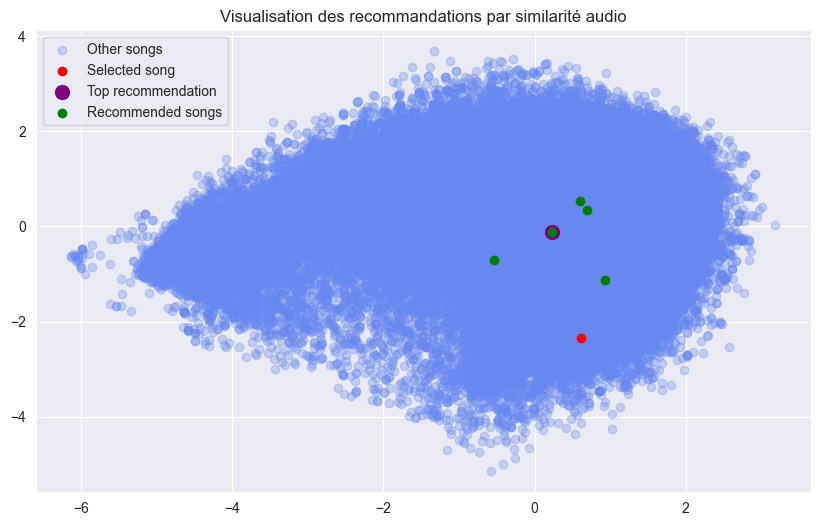

In [79]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.3, label='Other songs')
plt.scatter(X_pca[idx, 0], X_pca[idx, 1], color='red', label='Selected song')
plt.scatter(X_pca[recommendations.index[0], 0], X_pca[recommendations.index[0], 1], color='purple', label='Top recommendation', s=100)
plt.scatter(X_pca[recommendations.index, 0], X_pca[recommendations.index, 1],
            color='green', label='Recommended songs')
plt.legend()
plt.title("Visualisation des recommandations par similarité audio")
plt.show()